In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
ls

sample_data/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

df = pd.read_csv('/content/drive/MyDrive/data/heart.csv')
df.shape


(918, 12)

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


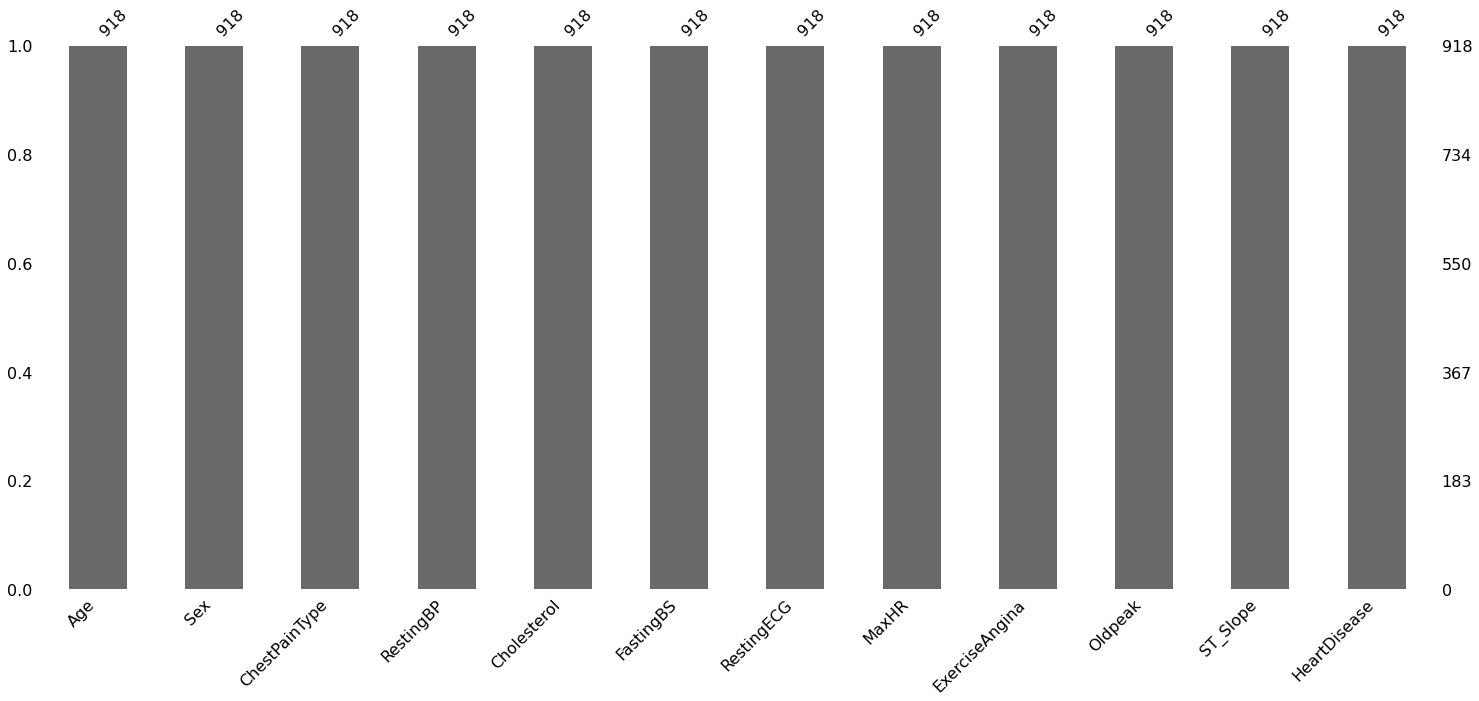

In [6]:
import missingno as msno
msno.bar(df)


In [7]:
#df.groupby(['Age']).Cholesterol.describe()

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
# make a sub dataFrame and make all OBJECT columns Category, so we can use "catplot"
df_category = df.astype({"Sex": "category", "ChestPainType": "category",'ExerciseAngina':'category','RestingECG': 'category','HeartDisease':'category','ST_Slope':'category' })
df_category.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease      category
dtype: object

In [10]:
#changing df itself to Category for objects
df = df.astype({"Sex": "category", "ChestPainType": "category",'ExerciseAngina':'category','RestingECG': 'category','HeartDisease':'category','ST_Slope':'category' })


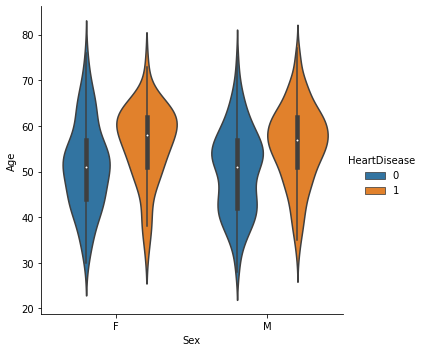

In [11]:
sns.catplot(x='Sex', y = 'Age',data = df_category, kind = 'violin', hue= 'HeartDisease')
# age of each sex and if they have HeartDisease
# Older male and female have more heart disease

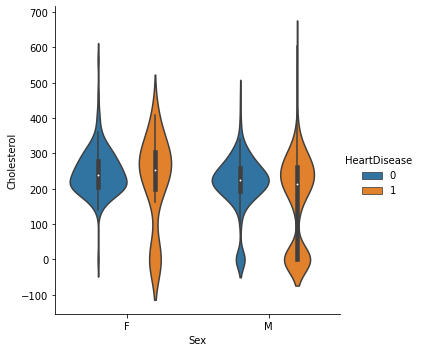

In [12]:
sns.catplot(x='Sex', y = 'Cholesterol',data = df_category, kind = 'violin', hue= 'HeartDisease')
# age of each sex and if they have HeartDisease
# Older male and female have more heart disease

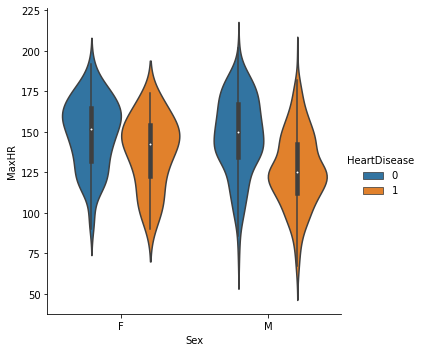

In [13]:
sns.catplot(x='Sex', y = 'MaxHR',data = df_category, kind = 'violin', hue= 'HeartDisease')
#both males and females with HIGHER maxHR has lower rates of heart disease, especially female

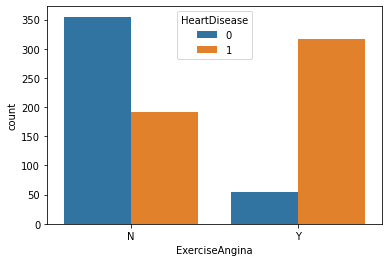

In [14]:
sns.countplot(x = 'ExerciseAngina', hue ='HeartDisease', data= df)

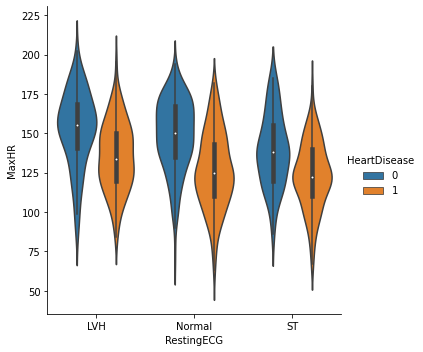

In [15]:
sns.catplot(x = 'RestingECG', y = 'MaxHR' , hue ='HeartDisease', data=df_category, kind = 'violin')

In [16]:
#sns.catplot(x = 'RestingECG', y = 'RestingBP' , hue ='HeartDisease', data=df_category,kind = 'violin')

In [17]:
df.corr()
# nothing is too correlated to each other, the highest being |0.4| (oldpeak and heart disease) (maxHR and heart disease, negatively correlated)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000


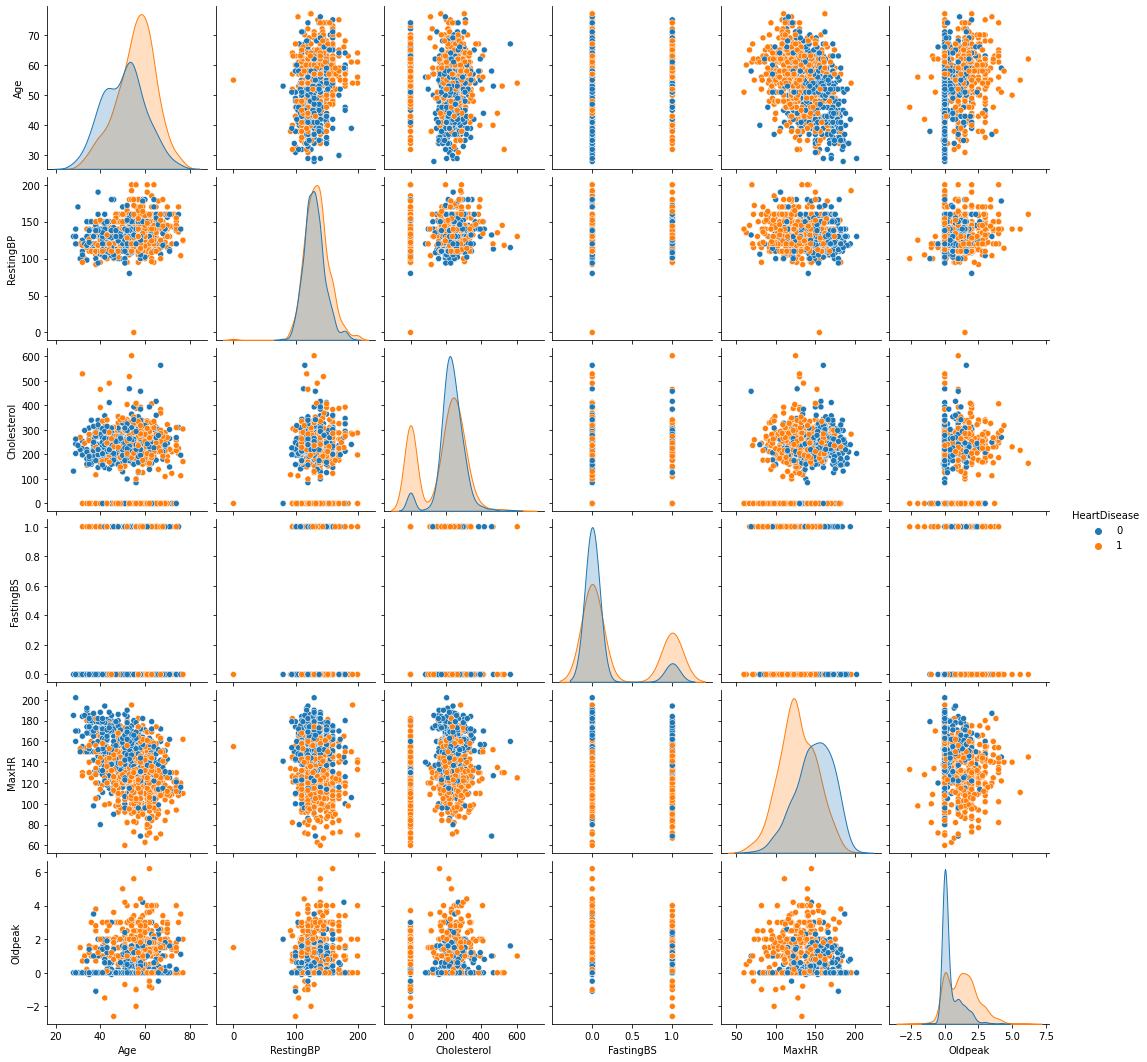

In [18]:
sns.pairplot(df,hue = 'HeartDisease')

In [19]:
# MaxHR against age -- higher HR has lower rate of heart disease even in higher age
# those with low MaxHR AND low RestingBP are a lot more likely to have heart disease (MaxHR VS RestingBP)


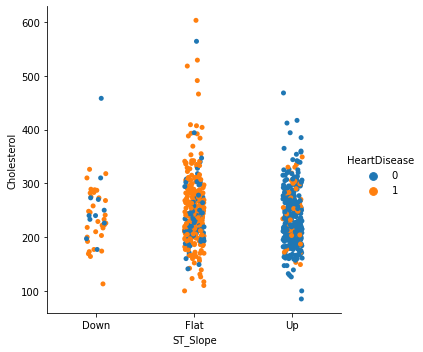

In [23]:
# need to clean out some rows with "0" in the cholesterol
# looks like there are a bunch of "0"s in Oldpeak, not sure what it is
# there are negative values in Old Peak
sns.catplot(y = 'Cholesterol', x = 'ST_Slope',data = df_cholesterol, hue ='HeartDisease')


In [22]:
#simply getting rid of '0s' In Cholesteral column
df_cholesterol = df.loc[df.Cholesterol != 0]

In [ ]:
# inpute cholesteral column with mean
#df.Cholesterol.replace({0:df.Cholesterol.mean()},inplace= True)
#df.head(10) # the Data without 0s in Cholesterol
#sns.relplot(x = 'Cholesterol', y= 'MaxHR',data = df, hue ='HeartDisease')

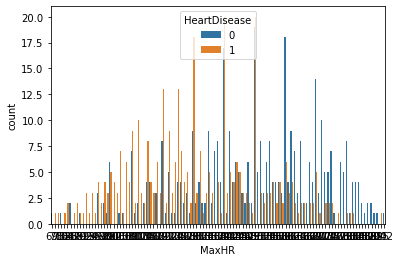

In [25]:
sns.countplot(x = 'MaxHR',data = df_cholesterol, hue ='HeartDisease')


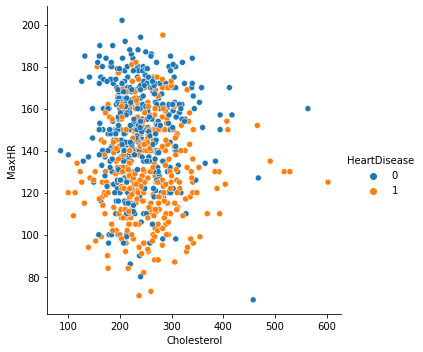

In [26]:
# those with higher MaxHR seem to have less heart diease
sns.relplot(x = 'Cholesterol', y= 'MaxHR',data = df_cholesterol, hue ='HeartDisease')


In [27]:
# Chest pain type "ASY" seem to have more heart diseaase (at lease density wise)
# might use BOOSSTRAPPING to 

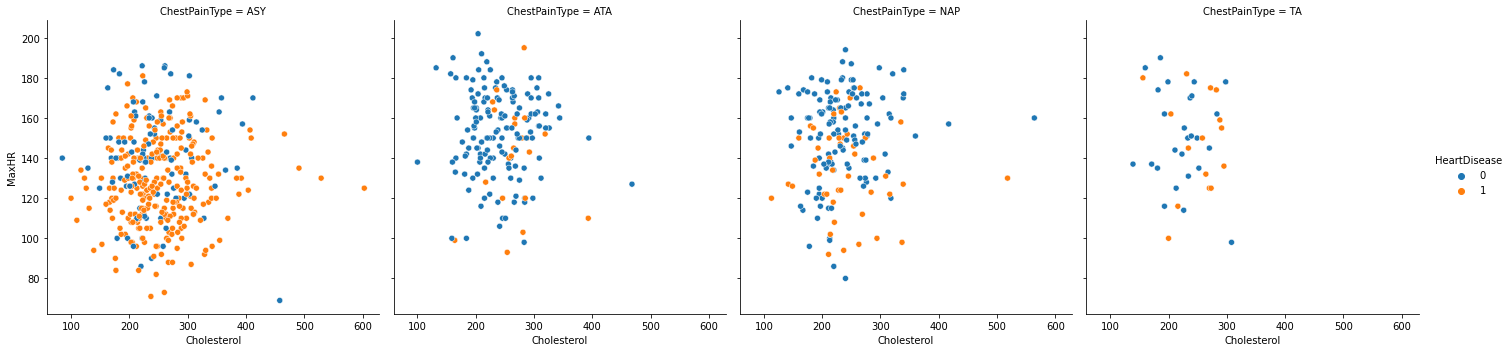

In [28]:
sns.relplot(x = 'Cholesterol', y= 'MaxHR',data = df_cholesterol, hue ='HeartDisease',col ='ChestPainType')

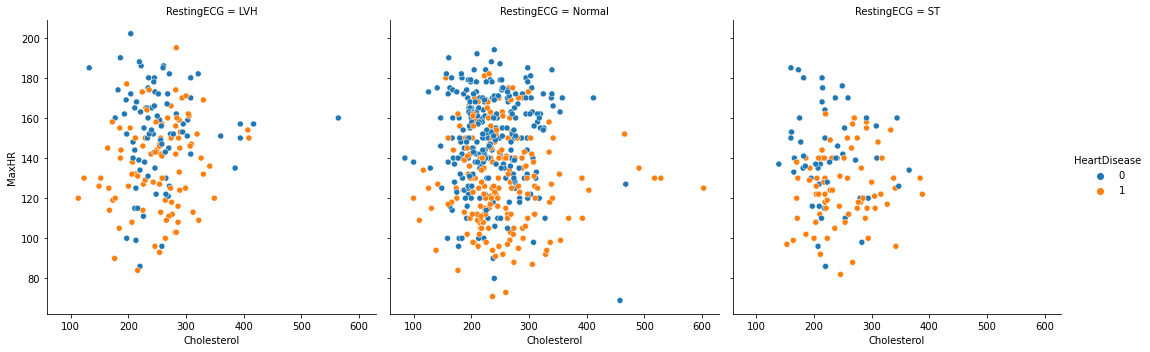

In [29]:
#Across RestingECG THOSE with LVH seem to have higher heart diease ratio
sns.relplot(x = 'Cholesterol', y= 'MaxHR',data = df_cholesterol, hue ='HeartDisease',col ='RestingECG')

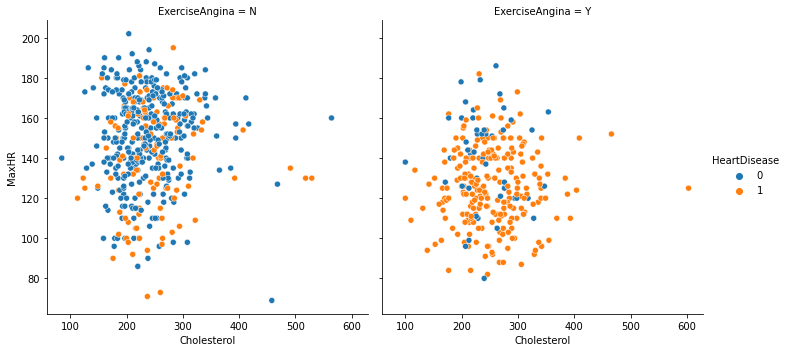

In [30]:
sns.relplot(x = 'Cholesterol', y= 'MaxHR',data = df_cholesterol, hue ='HeartDisease',col ='ExerciseAngina')
# those with Y on ExerciseAngina seem to have significantly higher heart disease ratio


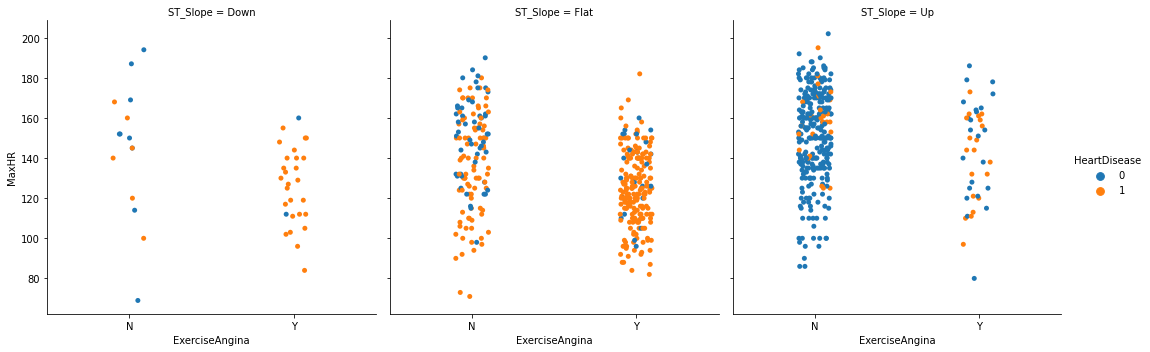

In [31]:
# those with ST_Slope up seem to have way lower rate of heart disease
sns.catplot(x = 'ExerciseAngina', y= 'MaxHR',data = df_cholesterol, hue ='HeartDisease',col ='ST_Slope')

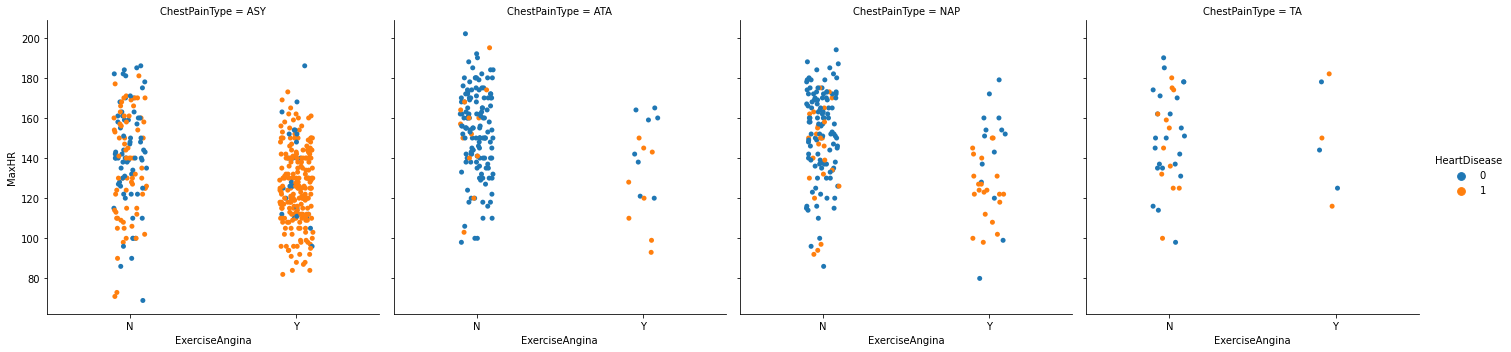

In [32]:
sns.catplot(x = 'ExerciseAngina', y= 'MaxHR',data = df_cholesterol, hue ='HeartDisease',col ='ChestPainType')

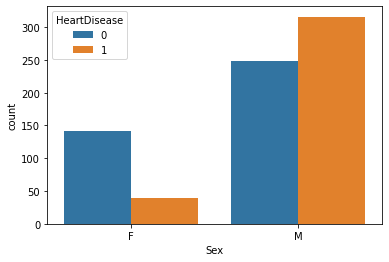

In [33]:
sns.countplot(x = 'Sex', hue = 'HeartDisease', data = df_cholesterol)

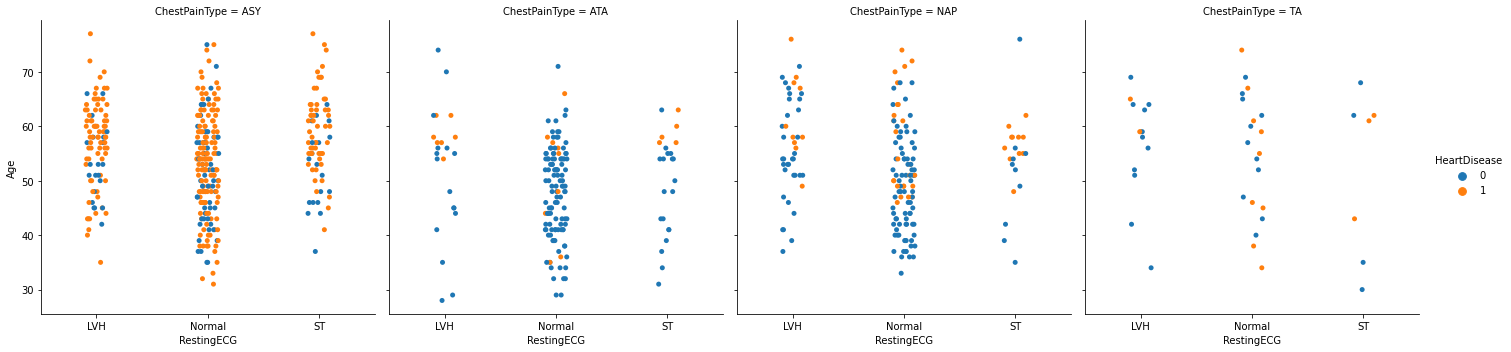

In [34]:
# Resting ECG
sns.catplot(x = 'RestingECG', y= 'Age',data = df_cholesterol, hue ='HeartDisease',col ='ChestPainType')

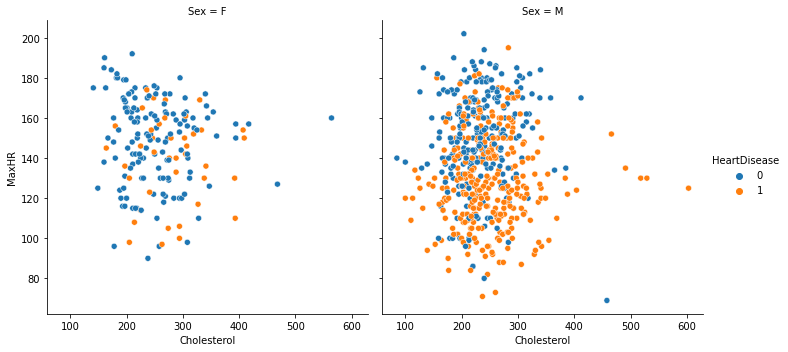

In [35]:
sns.relplot(x = 'Cholesterol', y= 'MaxHR',data = df_cholesterol, hue ='HeartDisease',col ='Sex')
# males also have more data points on and potentially higher rate of heart disease

In [36]:
# RestingBP vs MaxHR
#sns.relplot(x = 'RestingBP', y= 'MaxHR',data = df_cholesterol, hue ='HeartDisease')

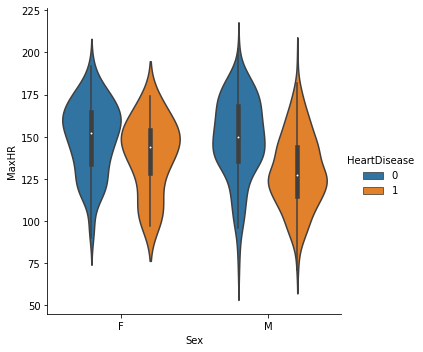

In [37]:
# Cholesterol and heart disease on the two sexs
# for females there seem to be a higher tendency to have heart diease with higher cholesterol
sns.catplot(x = 'Sex', y ='MaxHR', data = df_cholesterol, hue = 'HeartDisease', kind = 'violin')

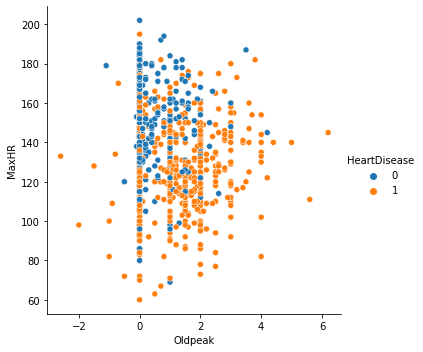

In [38]:
sns.relplot(x = 'Oldpeak', y= 'MaxHR',data = df, hue ='HeartDisease')

In [39]:
#simply getting rid of '0s' in Oldpeak
# don't seem right
df_oldpeak = df.loc[df_category.Oldpeak != 0]
df_oldpeak.Oldpeak.min()

-2.6

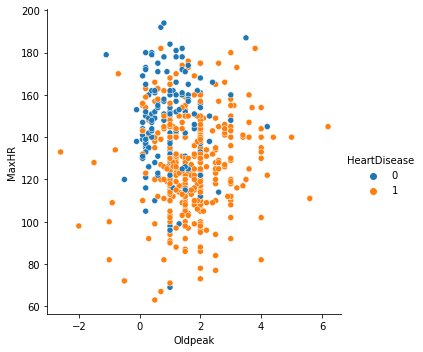

In [40]:
sns.relplot(x = 'Oldpeak', y= 'MaxHR',data = df_oldpeak, hue ='HeartDisease')

In [41]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
# creating a new Category column based on quantile of Cholesterol with qcut
# data used have no '0s' in Cholesterol
Cholesterol_level = ['very low',"low",  "medium", "high", "very high"]
df_cholesterol['Cholesterol_level'] = pd.qcut(x = df_cholesterol.Cholesterol, q=5, labels =Cholesterol_level)
df_cholesterol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_level
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,very high
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,very low
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,high
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,low
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,high
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,very low
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,very low
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,medium


In [43]:
# do the same for 'RestingBP', 'MaxHR'
RestingBP_level = ['very low',"low",  "medium", "high", "very high"]
df_cholesterol['RestingBP_level'] = pd.qcut(x = df_cholesterol.RestingBP, q=5, labels =RestingBP_level)

MaxHR_level = ['very low',"low",  "medium", "high", "very high"]
df_cholesterol['MaxHR_level'] = pd.qcut(x = df_cholesterol.MaxHR, q=5, labels =MaxHR_level)


df_cholesterol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_level,RestingBP_level,MaxHR_level
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,very high,high,very high
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,very low,very high,high
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,high,low,very low
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,low,high,very low
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,very low,very high,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,high,very low,low
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,very low,high,medium
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,very low,low,very low
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,medium,low,very high


In [44]:
# for 'Relative_Age', Categorize by age group, relatively_young: < 40, middle_aged: 40 - 60, senior: 60+
df_cholesterol.Age.quantile(q=[0.33,0.66,0.99])
df_cholesterol['Relative_Age'] = 'middle_aged'

df_cholesterol.loc[df_cholesterol.Age < 40, 'Relative_Age'] = 'young'
df_cholesterol.loc[df_cholesterol.Age > 60, 'Relative_Age'] = 'senior'
df_cholesterol['Relative_Age'] = df_cholesterol['Relative_Age'].astype('category')
df_cholesterol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_level,RestingBP_level,MaxHR_level,Relative_Age
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,very high,high,very high,middle_aged
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,very low,very high,high,middle_aged
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,high,low,very low,young
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,low,high,very low,middle_aged
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,very low,very high,low,middle_aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,high,very low,low,middle_aged
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,very low,high,medium,senior
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,very low,low,very low,middle_aged
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,medium,low,very high,middle_aged


In [ ]:
# export the processed data WITHOUT '0' in cholesteral
df_cholesterol.to_pickle("/content/drive/MyDrive/data/heart_cholesterol.pkl")

In [ ]:
# Do the same but without getting rid of '0s' in cholesterol
RestingBP_level = ['very low',"low",  "medium", "high", "very high"]
df['RestingBP_level'] = pd.qcut(x = df.RestingBP, q=5, labels =RestingBP_level)

MaxHR_level = ['very low',"low",  "medium", "high", "very high"]
df['MaxHR_level'] = pd.qcut(x = df.MaxHR, q=5, labels =MaxHR_level)


df

In [ ]:
df['Relative_Age'] = 'middle_aged'

df.loc[df.Age < 40, 'Relative_Age'] = 'young'
df.loc[df.Age > 60, 'Relative_Age'] = 'senior'
df['Relative_Age'] = df['Relative_Age'].astype('category')
df

In [ ]:
# export the data 
df.to_pickle("/content/drive/MyDrive/data/heart1.pkl")

In [ ]:
#making dummies for categorial columns
df = pd.read_csv('/content/drive/MyDrive/data/heart.csv')
df = df.astype({"Sex": "category", "ChestPainType": "category",'ExerciseAngina':'category','RestingECG': 'category','HeartDisease':'category','ST_Slope':'category' })
df.dtypes

In [ ]:
df

In [ ]:
#creating dummies
y_data = df.HeartDisease
df = pd.get_dummies(data = df.iloc[:,:-1])
df

In [ ]:
# get rid of some columns we don't need
#df.drop(columns = ['ST_Slope_Down','ExerciseAngina_N','ChestPainType_TA', 'Sex_F','RestingECG_ST'], inplace= True)


In [ ]:
# rename some columns
df['HeartDisease'] = y_data
df.rename(columns= {'Sex_M': 'Sex', 'ExerciseAngina_Y': 'ExerciseAngina'},inplace= True)
df

In [ ]:
df.shape
# didn't get rid of "0" columns in cholesteral

In [ ]:
# get rid of 0s in the new df
df = df.loc[df.Cholesterol != 0]
df

In [ ]:
# exporting the cleaned, dummied data
df.to_pickle("/content/drive/MyDrive/data/heart_cleaned_dummy.pkl")

In [ ]:
# Random Forest
